In [1]:
# load libraries 
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
import re
import random 
import seaborn as sns
random.seed(0)

### Part 1: Data Loading


This dataset is about the 911 calls and their priority including their time and location.

In [3]:
df = pd.read_csv('911_Police_Calls_for_Service.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# check first 50 rows
df.head(50)

,RecordID,CallNumber,CallDateTime,Priority,District,Description,IncidentLocation,ZipCode,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,Location
0,6612687,P192632768,09/20/2019 05:45:00 PM,Non-Emergency,SD,Business Check,600 CHERRY HILL RD,21225.0,Cherry Hill,Southern,922.0,10.0,D7,Cherry Hill,Census Tract 2502.07,NaN,"600 CHERRY HILL RD\nBALTIMORE, MD\n(39.250045,..."
1,6612679,P192632766,09/20/2019 05:45:00 PM,Non-Emergency,NE,Repairs/Service,FUEL-NORTHEAST,21212.0,Wilson Park,Northern,524.0,4.0,D2,Greater Govans,Census Tract 2710.01,NaN,"FUEL-NORTHEAST BALTIMORE, MD"
2,6612657,P192632765,09/20/2019 05:44:00 PM,Non-Emergency,SW,COMMUNITY ENGAGE,400 S AUGUSTA AV,21229.0,Irvington,Southwestern,833.0,8.0,D10,Allendale/Irvington/S. Hilton,Census Tract 2008,NaN,"400 S AUGUSTA AV\nBALTIMORE, MD\n(39.27983, -7..."
3,6612684,P192632762,09/20/2019 05:44:00 PM,Non-Emergency,ND,COMMUNITY ENGAGE,3100 ABELL AV,21218.0,Abell,Northern,513.0,14.0,D2,Greater Charles Village/Barclay,Census Tract 1202.01,NaN,"3100 ABELL AV\nBALTIMORE, MD\n(39.326102, -76...."
4,6612693,P192632764,09/20/2019 05:44:00 PM,Non-Emergency,WD,Traffic Stop,1300 BLK LAURENS ST,21217.0,Sandtown-Winchester,Western,743.0,9.0,D8,Sandtown-Winchester/Harlem Park,Census Tract 1601,Central,"1300 BLK LAURENS ST\nBALTIMORE, MD"
5,6612659,P192632782,09/20/2019 05:44:00 PM,Low,ND,NARCOTICS,5600 THE ALAMEDA,21239.0,Woodbourne Heights,Northeastern,414.0,4.0,D3,Loch Raven,Census Tract 2708.02,NaN,"5600 THE\nALAMEDA BALTIMORE, MD\n(39.025014, -..."
6,6612662,P192632769,09/20/2019 05:44:00 PM,High,ND,COMMON ASSAULT,4100 WELDON PL W,21211.0,Medfield,Northern,541.0,7.0,D2,Medfield/Hampden/Woodberry/Remington,Census Tract 1308.03,NaN,"4100 WELDON PL W\nBALTIMORE, MD\n(39.336773, -..."
7,6612688,P192632767,09/20/2019 05:43:00 PM,Non-Emergency,NE,INVESTIGATE AUTO,PERRING PY/E NORTHERN PY,21239.0,Hamilton Hills,Northeastern,423.0,3.0,D3,Harford/Echodale,Census Tract 2707.02,NaN,"E PERRING PY\nPY BALTIMORE, MD"
8,6612680,P192632761,09/20/2019 05:43:00 PM,Low,NW,OTHER,600,21201.0,University Of Maryland,Central,121.0,11.0,D8,Downtown/Seton Hill,Census Tract 402,NaN,NaN
9,6612674,P192632773,09/20/2019 05:43:00 PM,Non-Emergency,SS,SUPV COMPLAINT,3400 BELAIR RD,21213.0,Belair-Edison,Northeastern,432.0,13.0,D5,Belair-Edison,Census Tract 2603.01,Northeastern,"3400 BELAIR RD\nBALTIMORE, MD\n(39.322408, -76..."


In [5]:
# check last 50 rows
df.tail(50)

,RecordID,CallNumber,CallDateTime,Priority,District,Description,IncidentLocation,ZipCode,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,Location
6602724,5937733,131820053,07/01/2013 12:23:00 AM,Non-Emergency,ND,Repairs/Service,400 N FRONT ST,21202.0,Penn-Fallsway,Eastern,312.0,12.0,D7,Oldtown/Middle East,Census Tract 2805,NaN,"400 N FRONT ST\nBALTIMORE, MD\n(39.293035, -76..."
6602725,5937732,131820057,07/01/2013 12:23:00 AM,Medium,NE,Disorderly,1100 E COLD SPRING LA,21239.0,Wilson Park,Northern,524.0,4.0,D2,Greater Govans,Census Tract 2710.01,NaN,"1100 E COLD SPRING LA\nBALTIMORE, MD\n(39.3451..."
6602726,5937736,131820056,07/01/2013 12:22:00 AM,Low,CD,Destruct Propty,E CHASE ST/THE FALLSWAY,21202.0,Johnston Square,Eastern,311.0,12.0,D5,Midtown,Census Tract 1001,NaN,"E CHASE ST\nFALLSWAY BALTIMORE, MD"
6602727,5937737,131820052,07/01/2013 12:21:00 AM,Low,ED,Missing Person,3200 E MONUMENT ST,21205.0,Ellwood Park/Monument,Southeastern,224.0,13.0,D5,Madison/East End,Census Tract 701,NaN,"3200 E MONUMENT ST\nBALTIMORE, MD\n(39.299251,..."
6602728,5937738,131820047,07/01/2013 12:19:00 AM,Non-Emergency,SE,Vehicle Disturb,FLEET ST/S LUZERNE AV,21224.0,Canton,Southeastern,232.0,1.0,D6,Canton,Census Tract 103,NaN,"S FLEET ST\nBALTIMORE, MD"
6602729,5937739,131820048,07/01/2013 12:19:00 AM,Low,SD,*INVEST,300 WASHBURN AV,21225.0,Brooklyn,Southern,913.0,10.0,D7,Brooklyn/Curtis Bay/Hawkins Point,Census Tract 2504.01,NaN,"300 WASHBURN AV\nBALTIMORE, MD\n(39.235678, -7..."
6602730,5937740,131820041,07/01/2013 12:18:00 AM,Non-Emergency,WD,FOLLOW-UP,800-BLK W LEXINGTON ST,21201.0,Poppleton,Western,712.0,9.0,D8,Poppleton/The Terraces/Hollins Market,Census Tract 1801,NaN,"800 BLK W LEXINGTON ST\nBALTIMORE, MD\n(39.291..."
6602731,5937742,131820043,07/01/2013 12:17:00 AM,Medium,WD,NarcoticsOutside,EDMONDSON AV/N CALHOUN ST,21223.0,Harlem Park,Western,713.0,9.0,D8,Sandtown-Winchester/Harlem Park,Census Tract 1602,Central,"N EDMONDSON AV\nBALTIMORE, MD"
6602732,5937741,131820049,07/01/2013 12:17:00 AM,Low,ND,Other,2300 N CHARLES ST,21218.0,Old Goucher,Northern,514.0,12.0,D2,Greater Charles Village/Barclay,Census Tract 1206,NaN,"2300 N CHARLES ST\nBALTIMORE, MD\n(39.315422, ..."
6602733,5937743,131820044,07/01/2013 12:17:00 AM,Medium,SE,Disorderly,3200-20 E BALTIMORE ST,21224.0,Patterson Park Neighborhood,Southeastern,222.0,1.0,D6,Patterson Park North & East,Census Tract 102,NaN,"3200 20 E BALTIMORE ST\nBALTIMORE, MD\n(39.292..."


- **RecordID, CallNumber** contains the sepcific id of a person who called 911 and gave the **Description**
- it seems that **VRIzones** have many **nan** values 
- **CallDateTime** is in one format and maybe I can find something interesting further exploring years , motnhs or time

Lets check this further !


In [6]:
print("Total columns:", len(df.columns))
df.columns

Total columns: 17


Index(['RecordID', 'CallNumber', 'CallDateTime', 'Priority', 'District',
       'Description', 'IncidentLocation', 'ZipCode', 'Neighborhood',
       'PoliceDistrict', 'PolicePost', 'CouncilDistrict', 'SheriffDistricts',
       'Community_Statistical_Areas', 'Census_Tracts', 'VRIZones', 'Location'],
      dtype='object')

- There are 17 columns and some of the columns are not important like **RecordID, CallNumber, Description, IncidentLocation, 
    Location** and can be removed from the data set. 

- Also, I can remove columns which are giving same information like **ZipCode, Cencus_Tracts, Comunity_Statisical_Area** are giving same information of semi-permanent boundries under which different **Neighborhoods** come and the columns **District and Police District** also contains same information regarding the districts. So, I can keep **ZipCode and District**  and delete **Cencus_Tract, Community_Statistical_Area and PoliceDistrict** .

### Part 2: Explore the data

In [7]:
# making a copyof original data so that i can make changes in the new data keeping the original format safe. 
df_new = df.copy()

In [8]:
len(df)

6602774

since the length of data set is very big and I am taking only 0.1 million dataset to analyse it further.
But Instead of taking starting rows let's shuffle the data and take random rows so that I can get the all the possible variations in this small dataset which I may get in the big data set !

In [9]:
from sklearn.utils import shuffle
df_new = shuffle(df_new,random_state=0)


In [10]:
print("Old lenth:", len(df_new))
df_new = df_new [: 100000]
print("new length:", len(df_new))

Old lenth: 6602774
new length: 100000


In [11]:
df_new.head(50)

,RecordID,CallNumber,CallDateTime,Priority,District,Description,IncidentLocation,ZipCode,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,Location
4187368,3522376,P152652017,09/22/2015 04:31:00 PM,Low,TRU,LARCENY F/AUTO,200 E 33RD ST,21218.0,Charles Village,Northern,512.0,14.0,D2,Greater Charles Village/Barclay,Census Tract 1202.02,NaN,"200 E 33RD ST\nBALTIMORE, MD\n(39.328196, -76...."
4989104,4324114,143601919,12/26/2014 06:42:00 PM,Low,WD,Hit and Run,2100 W FAIRMOUNT AV,21223.0,Penrose/Fayette Street Outreach,Western,714.0,9.0,D8,Southwest Baltimore,Census Tract 2002,NaN,"2100 W FAIRMOUNT AV\nBALTIMORE, MD\n(39.288704..."
5515431,4850440,141831077,07/02/2014 10:11:00 AM,Non-Emergency,WD,Transport,300 E MADISON ST,21202.0,Mount Vernon,Central,142.0,11.0,D8,Midtown,Census Tract 1101,NaN,"300 E MADISON ST\nBALTIMORE, MD\n(39.298812, -..."
1889332,1224342,P173430345,12/09/2017 04:34:00 AM,Non-Emergency,SE,Repairs/Service,100,21202.0,Penn-Fallsway,Eastern,312.0,12.0,D7,Oldtown/Middle East,Census Tract 2805,NaN,NaN
3259209,2594219,P162182894,08/05/2016 08:40:00 PM,Medium,ND,NARCOTICS ONVIEW,200 E 20TH ST,21218.0,Barclay,Eastern,341.0,12.0,D2,Greater Charles Village/Barclay,Census Tract 1204,NaN,"200 E 20TH ST\nBALTIMORE, MD\n(39.312345, -76...."
4422056,3757064,P151902490,07/09/2015 05:57:00 PM,High,SW,Field Interview,100 S PAYSON ST,21223.0,Carrollton Ridge,Southern,934.0,9.0,D8,Southwest Baltimore,Census Tract 2003,Tri-District,"100 S PAYSON ST\nBALTIMORE, MD\n(39.286219, -7..."
3828577,3163587,P160271155,01/27/2016 12:39:00 PM,Medium,ND,911/NO VOICE,100 W 29TH ST,21218.0,Charles Village,Northern,512.0,12.0,D2,Greater Charles Village/Barclay,Census Tract 1206,NaN,"100 W 29TH ST\nBALTIMORE, MD\n(39.323091, -76...."
999432,334442,P183070834,11/03/2018 09:38:00 AM,High,ND,Traffic Stop,3600 OLD YORK RD,21218.0,Waverly,Northern,543.0,14.0,D2,The Waverlies,Census Tract 903,NaN,"3600 OLD YORK RD\nBALTIMORE, MD\n(39.332302, -..."
3350149,2685159,P161881986,07/06/2016 04:23:00 PM,Medium,ED,AED NONBREATHING,N BROADWAY/ASHLAND AV,21205.0,Middle East,Eastern,321.0,12.0,D5,Oldtown/Middle East,Census Tract 704,NaN,"N BROADWAY\nBALTIMORE, MD"
3943444,3278456,P153482719,12/14/2015 07:45:00 PM,Low,ND,AUTO ACCIDENT,GREENSPRING AV/LOYOLA SOUTHWAY,21209.0,Woodberry,Northern,533.0,6.0,D2,Medfield/Hampden/Woodberry/Remington,Census Tract 1308.06,NaN,"GREENSPRING AV\nSOUTHWAY BALTIMORE, MD"


In [12]:
df_new.tail(50)

,RecordID,CallNumber,CallDateTime,Priority,District,Description,IncidentLocation,ZipCode,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,Location
153487,6453637,P192202927,08/08/2019 05:35:00 PM,Non-Emergency,WD,Traffic Stop,N CAREY ST/BAKER ST,NaN,Sandtown-Winchester,Western,742.0,7.0,D8,Sandtown-Winchester/Harlem Park,Census Tract 1501,Western,"N CAREY ST\nBALTIMORE, MD"
2341191,1676203,P171780834,06/27/2017 09:37:00 AM,Medium,CD,SICK CASE,300 BLK WILSON ST,21217.0,Madison Park,Central,132.0,11.0,D8,Upton/Druid Heights,Census Tract 1402,NaN,"300 BLK WILSON ST\nBALTIMORE, MD\n(39.30691, -..."
616233,5986522,P190643963,03/05/2019 08:28:00 PM,Non-Emergency,NW,Business Check,2700 W COLD SPRING LN,21215.0,Central Park Heights,Northwestern,614.0,6.0,D2,Southern Park Heights,Census Tract 1513,NaN,"2700 W COLD SPRING LN\nBALTIMORE, MD\n(39.3395..."
3831511,3166521,P160260485,01/26/2016 08:33:00 AM,Low,NE,HIT AND RUN,1700 NORTHBOURNE RD,21239.0,Perring Loch,Northeastern,415.0,3.0,D4,Northwood,Census Tract 2709.02,NaN,"1700 NORTHBOURNE RD\nBALTIMORE, MD\n(39.35417,..."
378435,6224941,P191190647,04/29/2019 04:47:00 AM,Non-Emergency,SW,COMMUNITY ENGAGE,2400 WASHINGTON BL,NaN,Morrell Park,Southwestern,831.0,10.0,D7,Morrell Park/Violetville,Census Tract 2503.03,NaN,"2400 WASHINGTON\nBL BALTIMORE, MD\n(39.268358,..."
5141961,4476972,143032693,10/30/2014 07:32:00 PM,Low,NW,Traffic Stop,REISTERSTOWN RD/LIBERTY HEIGH AV,21215.0,Mondawmin,Western,731.0,7.0,D9,Greater Mondawmin,Census Tract 1505,NaN,"REISTERSTOWN RD\nBALTIMORE, MD"
4032491,3367501,P153170276,11/13/2015 04:07:00 AM,Medium,NE,DISORDERLY,SINCLAIR LN/DUDLEY AV,21213.0,Belair-Edison,Northeastern,433.0,13.0,D6,Belair-Edison,Census Tract 2603.03,NaN,"SINCLAIR LN\nBALTIMORE, MD"
2346451,1681463,P171761262,06/25/2017 12:45:00 PM,Medium,NW,911/NO VOICE,5400 REISTERSTOWN RD,21215.0,Woodmere,Northwestern,623.0,5.0,D1,Glen-Fallstaff,Census Tract 2801.01,NaN,"5400 REISTERSTOWN RD\nBALTIMORE, MD\n(39.34625..."
3050913,2385923,P162891189,10/15/2016 12:21:00 PM,Medium,ND,AUTO ACCIDENT,ROLAND AV/W COLD SPRING LN,21210.0,Roland Park,Northern,541.0,6.0,D2,Greater Roland Park/Poplar Hill,Census Tract 2714,NaN,"W ROLAND AV\nBALTIMORE, MD"
1901389,1236399,P173381294,12/04/2017 01:42:00 PM,Medium,SW,WOMEN SCREAMING,1400 BLOOMFIELD AV,21227.0,Violetville,Southwestern,832.0,10.0,D10,Morrell Park/Violetville,Census Tract 2501.03,NaN,"1400 BLOOMFIELD AV\nBALTIMORE, MD\n(39.261864,..."


#### CallDateTime
convert it into datetime format so that i can analyse it further wrt to time, year, months etc.

In [13]:
from datetime import datetime
from dateutil import parser

In [14]:
# parse calldatetime into datetime format
df_new['CallDateTime'] = df_new['CallDateTime'].apply(lambda dt_string: parser.parse(dt_string))

In [15]:
print('Null vlues:',df_new['CallDateTime'].isnull().sum())

Null vlues: 0


It has no null values.
Let's analyse it further by checking the call rates received in year, month and hour

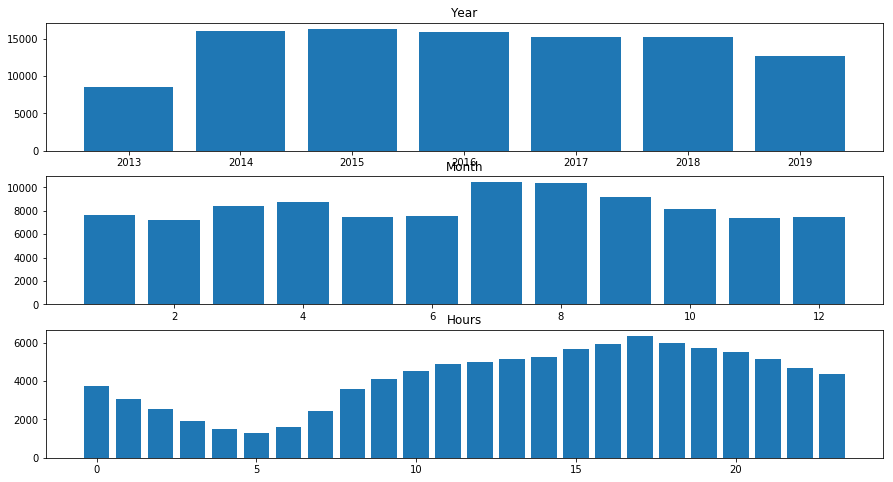

In [16]:
fig,axs =plt.subplots(3,1, figsize=[15, 8])
# plot year vs the count of the calls 
year = df_new['CallDateTime'].apply(lambda date: date.year)
year = sorted(year.value_counts().items(), key=lambda x : x[0])
year, count1 = zip(*year)
axs[0].bar(year, count1)
axs[0].set_title('Year')

# plot Month vs the count of the calls 
month = df_new['CallDateTime'].apply(lambda date : date.month)
month = sorted(month.value_counts().items(), key=lambda x: x[0])
month, count2 = zip(*month)
axs[1].bar(month,count2)
axs[1].set_title('Month')

# plot Hours vs the count of the calls 
hours = df_new['CallDateTime'].apply(lambda date: date.hour)
hours = sorted(hours.value_counts().items(), key=lambda x: x[0])
hours, count3 = zip(*hours)
axs[2].bar(hours, count3)
axs[2].set_title('Hours')
plt.show()

from the above graphs, it can be concluded that- 
 
- Police received less number of calls for the year 2013 maybe in 2013 crime rate was less ! 
- **March, April, July,August, September** are the months with maximum number of call and for the rest of the months, calls are around 8K per month
- Number of calls decrease **From 12am to 5am** as this is the least activity time.
- **From 5am - 5pm**, number of calls increase gradually and at **5pm-6pm** police receives maximum calls  

#### Priority


In [17]:
print(df_new['Priority'].unique())
print('Null values:',df_new['Priority'].isnull().sum())
df_new[df_new['Priority'].isnull()]


['Low' 'Non-Emergency' 'Medium' 'High' 'Out of Service' 'Emergency' nan]
Null values: 1


,RecordID,CallNumber,CallDateTime,Priority,District,Description,IncidentLocation,ZipCode,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,Location
4618648,3953658,P151262173,2015-05-06 17:48:00,NaN,ND,DISCHRG FIREARM,5000 READY AV,21212.0,Winston-Govans,Northern,524.0,4.0,D2,Greater Govans,Census Tract 2710.02,NaN,"5000 READY AV\nBALTIMORE, MD\n(39.349329, -76...."


- So, there are **'High' 'Medium' 'Low' 'Non-Emergency' 'Out of Service' 'Emergency' and NAN** in priority.
- Since there is only once row which has Nan value, I can easily remove this column but this column is quite important as it contains the status of calls which police receives every day and It will be very helpfull if we can predict the priority so that high priority calls can be entertain first. So, I am not omitting this row instead let's find out a way to fill the null value in priority.
- **Priority** is based on the **Description** given by the caller. So, I can fill the nan values in **Priority** using **Description** value.
- **Priority** is missing for ***DISCHRG FIREARM*** value of **Description**. So, let's check what is the priority for these value in the dataset


In [18]:
df_new[(df_new['Description'] =='DISCHRG FIREARM')]

,RecordID,CallNumber,CallDateTime,Priority,District,Description,IncidentLocation,ZipCode,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,Location
977731,312742,P183150157,2018-11-11 01:15:00,High,SD,DISCHRG FIREARM,1700 JACKSON ST,21230.0,Riverside,Southern,943.0,11.0,D7,South Baltimore,Census Tract 2404,NaN,"1700 JACKSON ST\nBALTIMORE, MD\n(39.270756, -7..."
4139719,3474727,P152810096,2015-10-08 00:29:00,High,SD,DISCHRG FIREARM,3500 7TH ST,21225.0,Brooklyn,Southern,913.0,10.0,D7,Brooklyn/Curtis Bay/Hawkins Point,Census Tract 2504.01,Brooklyn,"3500 7TH ST\nBALTIMORE, MD\n(39.237773, -76.59..."
2812203,2147215,P170122998,2017-01-12 20:41:00,High,ND,DISCHRG FIREARM,3100 BRENTWOOD AV,21218.0,Abell,Northern,513.0,14.0,D2,Greater Charles Village/Barclay,Census Tract 1202.01,NaN,"3100 BRENTWOOD AV\nBALTIMORE, MD\n(39.3265, -7..."
12260,6600274,P192600084,2019-09-17 00:26:00,High,NW,DISCHRG FIREARM,3200 POWHATAN AV,21216.0,Hanlon-Longwood,Northwestern,641.0,7.0,D9,Greater Mondawmin,Census Tract 1507.01,NaN,"3200 POWHATAN AV\nBALTIMORE, MD\n(39.318965, -..."
4556624,3891634,P151473398,2015-05-27 23:17:00,High,SE,DISCHRG FIREARM,0 BLK N BOND ST,21231.0,Washington Hill,Southeastern,212.0,12.0,D7,Harbor East/Little Italy,Census Tract 301,NaN,"0 BLK N BOND ST\nBALTIMORE, MD"
1422700,757711,P181573236,2018-06-06 23:12:00,High,SE,DISCHRG FIREARM,800 OLDHAM ST,21224.0,Greektown,Southeastern,242.0,1.0,D6,Orangeville/East Highlandtown,Census Tract 2607,NaN,"800 OLDHAM ST\nBALTIMORE, MD\n(39.283808, -76...."
1293879,628891,P182022432,2018-07-21 20:40:00,High,SD,DISCHRG FIREARM,1400 ELMTREE ST,21226.0,Curtis Bay,Southern,911.0,10.0,D7,Brooklyn/Curtis Bay/Hawkins Point,Census Tract 2505,NaN,"1400 ELMTREE ST\nBALTIMORE, MD\n(39.224351, -7..."
1462767,797777,P181441835,2018-05-24 13:54:00,High,EVT1,DISCHRG FIREARM,1100 E BALTIMORE ST,21202.0,Jonestown,Southeastern,211.0,12.0,D7,Harbor East/Little Italy,Census Tract 302,NaN,"1100 E BALTIMORE ST\nBALTIMORE, MD\n(39.290775..."
2644796,1979806,P170731863,2017-03-14 23:31:00,High,NE,DISCHRG FIREARM,4000 WHITE AV,21206.0,Glenham-Belhar,Northeastern,425.0,2.0,D4,Hamilton,Census Tract 2704.01,NaN,"4000 WHITE AV\nBALTIMORE, MD\n(39.345834, -76...."
2332881,1667890,P171803217,2017-06-29 22:28:00,High,SW,DISCHRG FIREARM,100 S TREMONT RD,21229.0,Tremont,Southwestern,822.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2804.03,NaN,"100 S TREMONT RD\nBALTIMORE, MD\n(39.28275, -7..."


**DISCHRG FIREARM** has **high** priority and no other status apart from this.
Therefore, to fill the missing values of **Priority**, I can make a dictionary which contains priority for the each unique description and In place of nan values of priority in the dataset, I can put the priority value from the dictionary whose description(key) matches from the nan value priority's description value.


In [19]:
# check null values of description
print('Null value:', df_new['Description'].isnull().sum())
# make discription dictionary  which contains "discription" as a key and "priority" as a value
description_dict =  {description: list(df_new[df_new['Description']== description]['Priority'])[0] for description in df_new['Description'].unique()}

# get index of nans in priority column
index_of_nan_priority = pd.isnull(df_new['Priority']).nonzero()[0]
print('Length of index list:',len(index_of_nan_priority))

# fill missing values
for idx in index_of_nan_priority:
    description = df_new['Description'].iloc[idx]
    if description in description_dict:
        df_new['Priority'].iloc[idx] = description_dict[description]
        
print('Null value in Priority:', df_new['Priority'].isnull().sum())


Null value: 0
Length of index list: 1
Null value in Priority: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Medium            44509
Low               24100
Non-Emergency     17629
High              13654
Out of Service       78
Emergency            30
Name: Priority, dtype: int64


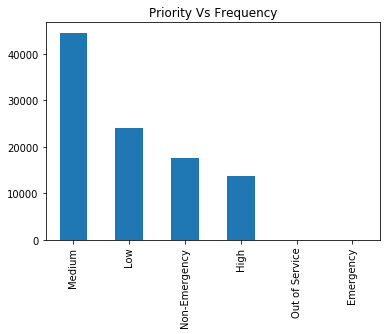

In [20]:
print(df_new['Priority'].value_counts())
df_new['Priority'].value_counts().plot('bar')
plt.title('Priority Vs Frequency')
plt.show()

It seems that Police receives **medium priority** calls (**COMMON ASSAULT**) maximum and least **Emergency** calls

let's check which Locality has maximum number of *High, Medium, Low, etc priorities*


 - *First, divide the data into High, Low, Medium, Non_Emergency, Out_of_Service, Emergency data sets which conatins High, Low, Medium, Non_Emergency, Out_of_Service, Emergency priority only*
 - *Then check the variations of priorities wrt to zipcodes*

In [21]:
df_new['Priority'].unique()

array(['Low', 'Non-Emergency', 'Medium', 'High', 'Out of Service',
       'Emergency'], dtype=object)

In [22]:
high = df_new[df_new['Priority'] == 'High']
Medium = df_new[df_new['Priority'] == 'Medium']
Low = df_new[df_new['Priority'] == 'Low']
Non_Emergency = df_new[df_new['Priority'] == 'Non-Emergency']
Out_of_Service = df_new[df_new['Priority'] == 'Out of Service']
Emergency = df_new[df_new['Priority'] == 'Emergency']

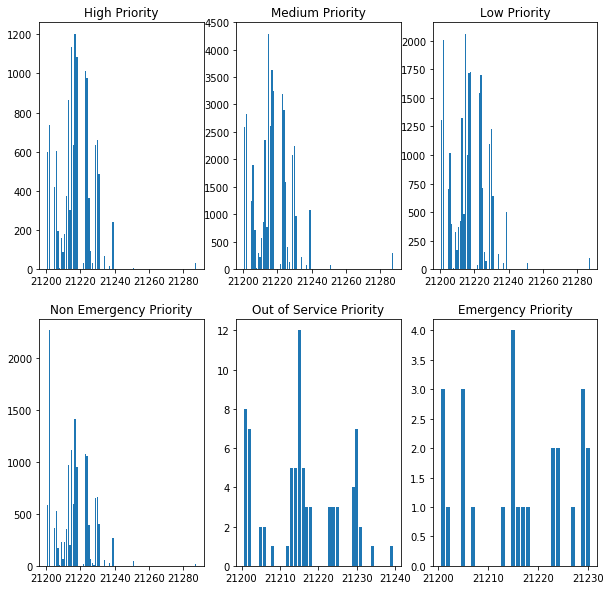

In [23]:
fig, axs = plt.subplots(2,3, figsize=(10,10))
axs[0,0].bar(high['ZipCode'].value_counts().keys(), high['ZipCode'].value_counts().values)
axs[0,0].set_title('High Priority')
axs[0,1].bar(Medium['ZipCode'].value_counts().keys(), Medium['ZipCode'].value_counts().values)
axs[0,1].set_title('Medium Priority')
axs[0,2].bar(Low['ZipCode'].value_counts().keys(),Low['ZipCode'].value_counts().values)
axs[0,2].set_title('Low Priority')
axs[1,0].bar(Non_Emergency['ZipCode'].value_counts().keys(), Non_Emergency['ZipCode'].value_counts().values)
axs[1,0].set_title('Non Emergency Priority')
axs[1,1].bar(Out_of_Service['ZipCode'].value_counts().keys(), Out_of_Service['ZipCode'].value_counts().values)
axs[1,1].set_title('Out of Service Priority')
axs[1,2].bar(Emergency['ZipCode'].value_counts().keys(), Emergency['ZipCode'].value_counts().values)
axs[1,2].set_title('Emergency Priority')
plt.show()

- It seems that according to the samples I have taken there is no data present for **ZipCode** greater than **21240** 
- And areas between 21200 and 21230 are quite unsafe and make maximum 911 calls 

#### ZipCode

In [24]:
print(sorted(df_new['ZipCode'].unique()))
print('Null values:',df_new['ZipCode'].isnull().sum())


[21201.0, 21202.0, 21205.0, 21206.0, 21207.0, 21208.0, 21209.0, 21210.0, 21211.0, 21212.0, 21213.0, 21214.0, 21215.0, 21216.0, 21217.0, 21218.0, 21223.0, nan, 21222.0, 21224.0, 21225.0, 21226.0, 21227.0, 21228.0, 21229.0, 21230.0, 21231.0, 21234.0, 21236.0, 21237.0, 21239.0, 21251.0, 21287.0]
Null values: 5288


- There are many values for **ZipCode** are missing, one way to deal with it is to remove these rows but it will reduce the data set!
- another way is zipcode for each **Neighborhood** is constant, so, I can make a dictionary which conatins neighborhood and its respective zipcode. Therefore, for the missing value of zipcode I can put the zip code from neighborhood dictionary wrt to neighborhood present in the missing zipcode row.

*Let's apply the 2nd way and fill missing zipcodes*

In [25]:
print(len(df_new['Neighborhood'].unique()))
print("Null value:", df_new['Neighborhood'].isnull().sum())
df_new.dropna(subset=['Neighborhood'], inplace=True)
print("size of dataset:", len(df_new))

279
Null value: 860
size of dataset: 99140


- Null values for **Neighborhood** is less and does not affect dataset that much. 
- Also, to fill zipcode missing values I need all the unique values of **Neighborhood** excluding nan.
- Therefore, dropping null values for **Neighborhood**is the right option.

Let's check how many **Neoghborhood** comes in one **ZipCode**

In [27]:
nbh_zip = df_new[['Neighborhood', 'ZipCode']]
nbh_zip = nbh_zip
nbh_zip = nbh_zip.sort_values(by=['ZipCode'])
nbh_zip.head()


,Neighborhood,ZipCode
3106579,Mount Vernon,21201.0
1649262,Downtown,21201.0
3340972,Seton Hill,21201.0
653520,Mid-Town Belvedere,21201.0
3212962,Downtown West,21201.0


clearly from the above, I can say that one **ZipCode** contains a group of neighborhoods.
for example, zipcode **21201** is the zipcode for **Downtown, Upton, Mount Vernon** etc

Let's fill the missing values of **ZipCode** using the above algorithm.

- *to perform this alorithm, first make a new data set which contains non null values of zipcode and neoghborhood, so that I can take unique value of zipcode wrt to neighborhood*

In [28]:
from statistics import mode
# puting df_new data into df2 so that I can take non null values and
df2 = df_new.dropna(subset=['ZipCode', 'Neighborhood'])
neighborhood = df2['Neighborhood'].unique()
print('Unique Neighborhoods:', len(neighborhood))

# neighborhood dictionary
neighborhood_dict = {nbh : mode(list(df2[df2['Neighborhood'] == nbh]['ZipCode'])) for nbh in neighborhood}
print("Lenght of Neighborhood dict:", len(neighborhood_dict))
sorted(neighborhood_dict.items(), key=lambda x: x[1])


Unique Neighborhoods: 278
Lenght of Neighborhood dict: 278


[('Mount Vernon', 21201.0),
 ('Mid-Town Belvedere', 21201.0),
 ('Downtown West', 21201.0),
 ('Seton Hill', 21201.0),
 ('Otterbein', 21201.0),
 ('Heritage Crossing', 21201.0),
 ('University Of Maryland', 21201.0),
 ('Penn-Fallsway', 21202.0),
 ('Downtown', 21202.0),
 ('Inner Harbor', 21202.0),
 ('Little Italy', 21202.0),
 ('Jonestown', 21202.0),
 ('Oldtown', 21202.0),
 ('Johnston Square', 21202.0),
 ('Greenmount West', 21202.0),
 ('Pleasant View Gardens', 21202.0),
 ('Greenmount Cemetery', 21202.0),
 ('Middle East', 21205.0),
 ('Gay Street', 21205.0),
 ('Armistead Gardens', 21205.0),
 ('McElderry Park', 21205.0),
 ('Madison-Eastend', 21205.0),
 ('Milton-Montford', 21205.0),
 ('Belair-Parkside', 21206.0),
 ('Frankford', 21206.0),
 ('Arcadia', 21206.0),
 ('Glenham-Belhar', 21206.0),
 ('Parkside', 21206.0),
 ('Cedonia', 21206.0),
 ('Waltherson', 21206.0),
 ('Rosemont East', 21206.0),
 ('Lower Herring Run Park', 21206.0),
 ('Overlea', 21206.0),
 ('Cedmont', 21206.0),
 ('Central Forest Park'

 Fill the missing values

In [29]:
# get the index of null values in zipcode
index_of_nan_zipcode = pd.isnull(df_new['ZipCode']).nonzero()[0] 

# fill the missing values of zipcode using neighbrhood dict
for idx in index_of_nan_zipcode:
    if df_new['Neighborhood'].iloc[idx] in neighborhood_dict:
        df_new['ZipCode'].iloc[idx] = neighborhood_dict[df_new['Neighborhood'].iloc[idx]]
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


In [30]:
print("Null Values in ZipCode:", df_new['ZipCode'].isnull().sum())

Null Values in ZipCode: 0


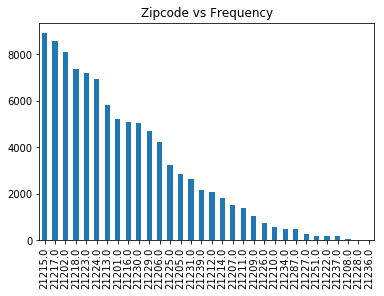

In [31]:
# print(df_new['ZipCode'].value_counts())
df_new['ZipCode'].value_counts().plot('bar')
plt.title('Zipcode vs Frequency')
plt.show()

It appears that the **Police receives maximum calls from 21215, 21217, 21202 zipcodes** and **minimum calls from 21228 and 21236 zipcodes**


let's dig deep for zipcodes 21228 and 21236

In [32]:
less_calls_dataset = df_new[(df_new['ZipCode'] == 21228)| (df_new['ZipCode'] == 21236)]
less_calls_dataset

,RecordID,CallNumber,CallDateTime,Priority,District,Description,IncidentLocation,ZipCode,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,Location
4395124,3730137,P151991038,2015-07-18 10:20:00,Non-Emergency,SW,ANIMAL DISTURB,FREDERICK AV/TAYLOR AV,21228.0,Beechfield,Southwestern,833.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2501.01,NaN,"FREDERICK AV\nBALTIMORE, MD"
487105,6113562,P190944435,2019-04-04 19:59:00,Medium,SW,DISORDERLY,FREDERICK AV/MALLOW HILL RD,21228.0,Beechfield,Southwestern,833.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2501.01,NaN,"FREDERICK AV\nBALTIMORE, MD"
3572586,2907596,P161160195,2016-04-25 01:53:00,Medium,SW,FAMILY DISTURB,5400 BLK FREDERICK AV,21228.0,Westgate,Southwestern,823.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2501.01,NaN,"5400 BLK FREDERICK AV\nBALTIMORE, MD\n(39.2799..."
2184342,1519354,P172321458,2017-08-20 14:42:00,High,NE,SILENT ALARM,7700 EVERALL AV,21236.0,Taylor Heights,Northeastern,424.0,2.0,D4,Harford/Echodale,Census Tract 2705.01,NaN,"7700 EVERALL AV\nBALTIMORE, MD"
3603704,2938715,P161060687,2016-04-15 08:11:00,Medium,SW,SUSPICIOUS PERS,BOSWELL RD/FREDERICK AV,21228.0,Westgate,Southwestern,823.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2501.01,NaN,"BOSWELL RD\nBALTIMORE, MD"
3698894,3033904,P160732213,2016-03-13 19:46:00,Medium,SW,SEE TEXT,FREDERICK AV/OVERBROOK RD,21228.0,Beechfield,Southwestern,833.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2501.01,NaN,"FREDERICK AV\nBALTIMORE, MD"
5726300,5061310,141171959,2014-04-27 16:22:00,Medium,SW,Suspicious Pers,5500 FREDERICK AV,21228.0,Westgate,Southwestern,823.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2804.03,NaN,"5500 FREDERICK AV\nBALTIMORE, MD\n(39.278669, ..."
468833,6125931,P190983920,2019-04-08 19:16:00,Non-Emergency,SW,LOUD MUSIC,5500 BLK FREDERICK AV,21228.0,Beechfield,Southwestern,833.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2501.01,NaN,"5500 BLK FREDERICK AV\nBALTIMORE, MD\n(39.2786..."
1844884,1179894,P173621161,2017-12-28 13:45:00,Medium,NE,SUSPICIOUS PERS,TAYLOR AV/WINDY RIDGE,21236.0,Overlea,Northeastern,424.0,2.0,D4,Harford/Echodale,Census Tract 2705.01,NaN,"TAYLOR AV\nBALTIMORE, MD"
2163939,1498949,P172391879,2017-08-27 17:29:00,High,SW,AUTO ACC/INJURY,300 BLK TAYLOR AV,21228.0,Beechfield,Southwestern,833.0,8.0,D10,Beechfield/Ten Hills/West Hills,Census Tract 2501.01,NaN,"300 BLK TAYLOR AV\nBALTIMORE, MD\n(39.278135, ..."


['Non-Emergency' 'Medium' 'High' 'Low']


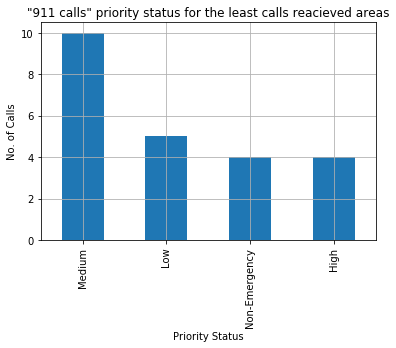

In [33]:
print(less_calls_dataset['Priority'].unique())
less_calls_dataset['Priority'].value_counts().plot('bar')
plt.title('"911 calls" priority status for the least calls reacieved areas')
plt.ylabel('No. of Calls')
plt.xlabel('Priority Status')
plt.grid()
plt.show()

it seems Neighborhood under zipcodes 21228 and 21236 are safe and make less number of calls  

Let's check which are the neighborhoods which come under these areas

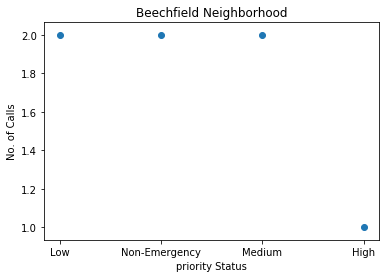

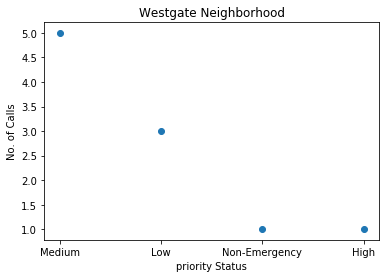

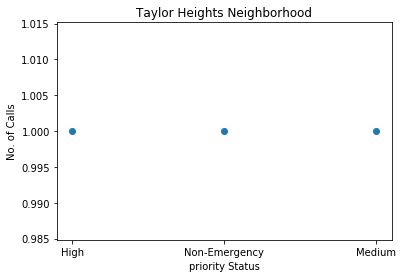

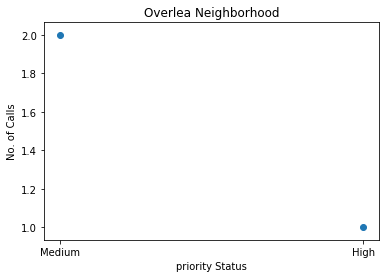

In [34]:
nbh = less_calls_dataset['Neighborhood'].unique()
for n in nbh:
    p_count = less_calls_dataset[less_calls_dataset['Neighborhood'] == n]['Priority'].value_counts()
    plt.scatter(p_count.keys(), p_count.values)
    plt.title(n + " Neighborhood")
    plt.ylabel('No. of Calls')
    plt.xlabel('priority Status')
    plt.show()


look like these neighborhoods are quite safe

#### Neighborhood

In [35]:
print(df_new['Neighborhood'].value_counts())



Downtown                           3604
Frankford                          2155
Penn-Fallsway                      2100
Sandtown-Winchester                1994
Belair-Edison                      1908
Brooklyn                           1649
Upton                              1516
Coldstream Homestead Montebello    1341
Carrollton Ridge                   1323
Central Park Heights               1280
Broadway East                      1184
Mondawmin                          1142
Fells Point                        1052
Cherry Hill                        1037
Penn North                         1030
Canton                             1000
East Baltimore Midway               999
Penrose/Fayette Street Outreach     994
Mount Vernon                        969
Washington Village/Pigtown          967
Arlington                           936
McElderry Park                      858
Irvington                           837
Patterson Park Neighborhood         825
Bridgeview/Greenlawn                811


it appears that **Downtown, Frankford, Penn-Fallsway** make maximum number of calls  

In [36]:
print("Downtown ZipCode:", neighborhood_dict['Downtown'])
print("Penn-Fallsway ZipCode:", neighborhood_dict['Penn-Fallsway'])
print("Frankford ZipCode:", neighborhood_dict['Frankford'])
# sorted(neighborhood_dict.items(), key=lambda x: x[1])[:50]

Downtown ZipCode: 21202.0
Penn-Fallsway ZipCode: 21202.0
Frankford ZipCode: 21206.0


#### VRIZone

In [37]:
print(df_new['VRIZones'].value_counts())
print('Null values:', df_new['VRIZones'].isnull().sum())

Western         2723
Tri-District    2538
Central         2288
Eastern1        1688
Northwestern    1603
Eastern2        1063
Northeastern    1050
Brooklyn         762
Name: VRIZones, dtype: int64
Null values: 85425


Null values are very high in this column! 

let's name these null values as **Unknown** and anlyse it further

In [38]:
df_new['VRIZones'].fillna('Unknown', inplace=True)
print('Null values:', df_new['VRIZones'].isnull().sum())
print(df_new['VRIZones'].value_counts())

Null values: 0
Unknown         85425
Western          2723
Tri-District     2538
Central          2288
Eastern1         1688
Northwestern     1603
Eastern2         1063
Northeastern     1050
Brooklyn          762
Name: VRIZones, dtype: int64


There are lot of unknown values in VRIZones which means that it is implemented in few parts.
And I have checked on the internet that it is implemented on the dangerous neighborhood of the baltimore. 

Let's find some relationship of VRIZones with other columns

### Part 3: Finding relationship between two variables 

it may be possible that priority and VRIZones have some relationship. 
Let's check this out 

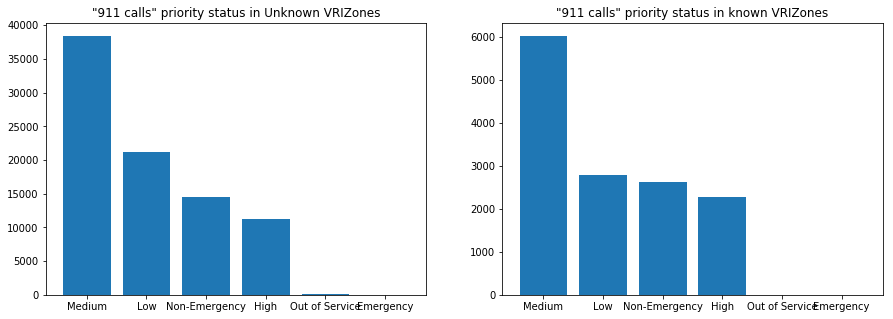

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].bar(df_new[df_new['VRIZones'] == 'Unknown']['Priority'].value_counts().keys(), df_new[df_new['VRIZones'] == 'Unknown']['Priority'].value_counts().values)
ax[0].set_title('"911 calls" priority status in Unknown VRIZones')
ax[1].bar(df_new[df_new['VRIZones'] != 'Unknown']['Priority'].value_counts().keys(),df_new[df_new['VRIZones'] != 'Unknown']['Priority'].value_counts().values)
ax[1].set_title('"911 calls" priority status in known VRIZones')
plt.show()


**VRIZones is Volience Reduction Zones which is implemented in dangerous neighborhoods of Baltimore to reduce crime**
- I can see that number of 911 calls in VRIZones implemented areas is significantly lower which means that VRIZones is helping in reducing crime in a positive way.
- It appears that High to Medium calls ratio in Non-VRIZones is 1:4 while the ratio in VRIZones is 1:3

### Part 4 : Finding Relationship between 3 variables

Function to group the columns - It returen a dictionary which contains the values of column1, column2 and the frequency of column1 wrt to column2 

In [40]:
def get_group(column1, column2, df_new, plot_data=None):
    grp = df_new.groupby([column1, column2]).size().drop_duplicates()
#     print(grp)
    if plot_data:
        plt.figure(figsize=(20,10))
        grp.plot()
        plt.grid()
        plt.legend()
        plt.xlabel(str(column1)+ "-" + str(column2))
        plt.ylabel('Frequency')
        plt.show()
    return grp

In [41]:
df_new['Priority'].unique()

array(['Low', 'Non-Emergency', 'Medium', 'High', 'Out of Service',
       'Emergency'], dtype=object)

In [42]:
priority_encoder = {'Emergency': 2,'Non-Emergency':0 ,'Out of Service':1 ,'Low': 3 , 'Medium': 4 ,'High': 5}


Function to plot 3d scatter plot 

In [43]:
def plot_3d(grp, xlabel, priority_encoder,title,xencoder=None):
    x_priority, count = zip(*list(grp.items()))
    x, priority = zip(*x_priority)
    
    priority = [ priority_encoder[p_val] for p_val in priority if p_val in priority_encoder]
    count = list(count)
    
    if xencoder:
        x = [ xencoder[x_val] for x_val in x if x_val in xencoder]
    else:
        x = [int(val) for val in x]
        
#     print(len(x), len(priority), len(count))    

    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    p = ax.scatter3D(x, priority, count, c=priority, cmap='viridis', 
                 label=' Non-Emergency: 0\n Out of Service: 1\n Emergency : 2\n Low: 3\n Medium:4\n High: 5')
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Priority')
    ax.set_zlabel('Frequency of Priority status for each ' + str(xlabel))
    plt.title(title)
    fig.colorbar(p)
    plt.show()


#### Zipcode vs Priority vs Frequency of calls

In [44]:
# z_grp contains 3 columns col1, col2, and its frequency
z_grp = get_group(column1='ZipCode', column2='Priority', df_new=df_new)

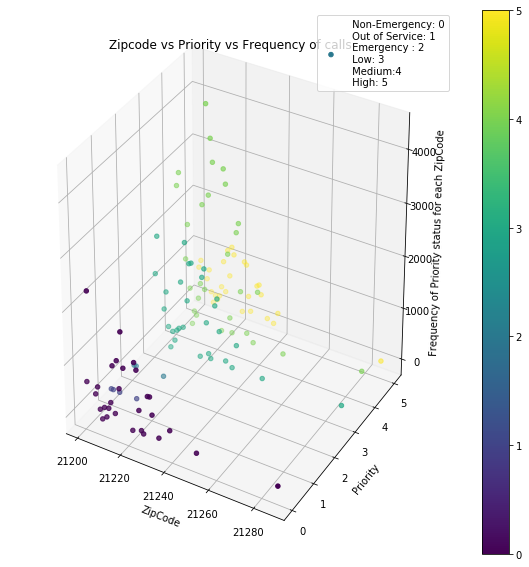

In [45]:
plot_3d(z_grp,priority_encoder=priority_encoder, xlabel='ZipCode', title='Zipcode vs Priority vs Frequency of calls')


**Deoendent Variable:** Frequency of Calls

**Independent Variables:** ZipCode and Priority

It appears that for the each value of zipcode and priority, I can predict frequency of calls


**The reason for taking taking priority and zipcode as Independent variables:**
From the above analysis, I saw that frequency of calls varies with both zipcodes and priorities of the calls.

pasted the zipcode and priority variation graphs for the reference 

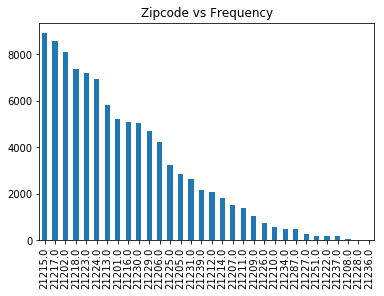

In [46]:
# time vs priority 
# print(df_new['ZipCode'].value_counts())
df_new['ZipCode'].value_counts().plot('bar')
plt.title('Zipcode vs Frequency')
plt.show()

['Non-Emergency' 'Medium' 'High' 'Low']


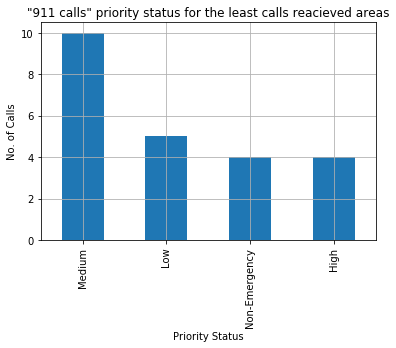

In [47]:
print(less_calls_dataset['Priority'].unique())
less_calls_dataset['Priority'].value_counts().plot('bar')
plt.title('"911 calls" priority status for the least calls reacieved areas')
plt.ylabel('No. of Calls')
plt.xlabel('Priority Status')
plt.grid()
plt.show()

**In the same way as above, we can predict the number of calls given hour of the day and priority or we can say that at any given hour we can predcit the number of calls for each priority.**

The frequency of calls also vary with the hours so it is also dependent on time also.

In [48]:
df_new['Hours'] = df_new['CallDateTime'].apply(lambda date: date.hour )
t_grp = get_group(column1='Hours', column2='Priority', df_new=df_new)

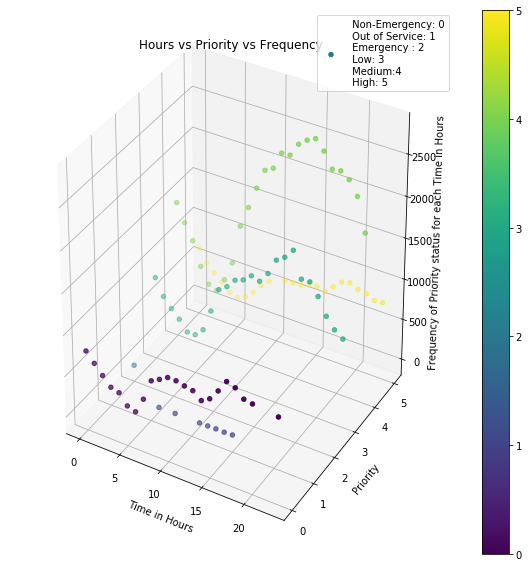

In [49]:
plot_3d(grp=t_grp, xlabel='Time in Hours', priority_encoder=priority_encoder, title="Hours vs Priority vs Frequency")  

**P.S.:** The motive to predict frequency of calls is that we can plan in advance the requirement of police workforce.